In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
train_df = pd.read_csv("Training.csv")
test_df = pd.read_csv("Testing.csv")

train_df.shape, test_df.shape

((4920, 134), (42, 133))

In [3]:
train_df.drop(["Unnamed: 133"], axis=1, inplace=True)
train_df.shape, test_df.shape

((4920, 133), (42, 133))

In [4]:
symptoms = train_df.drop(["prognosis"], axis=1)
top_symptoms = symptoms.sum().sort_values(ascending=False)
top_symptoms

fatigue                      1932
vomiting                     1914
high_fever                   1362
loss_of_appetite             1152
nausea                       1146
                             ... 
extra_marital_contacts        108
spinning_movements            108
weakness_of_one_body_side     108
foul_smell_of urine           102
fluid_overload                  0
Length: 132, dtype: int64

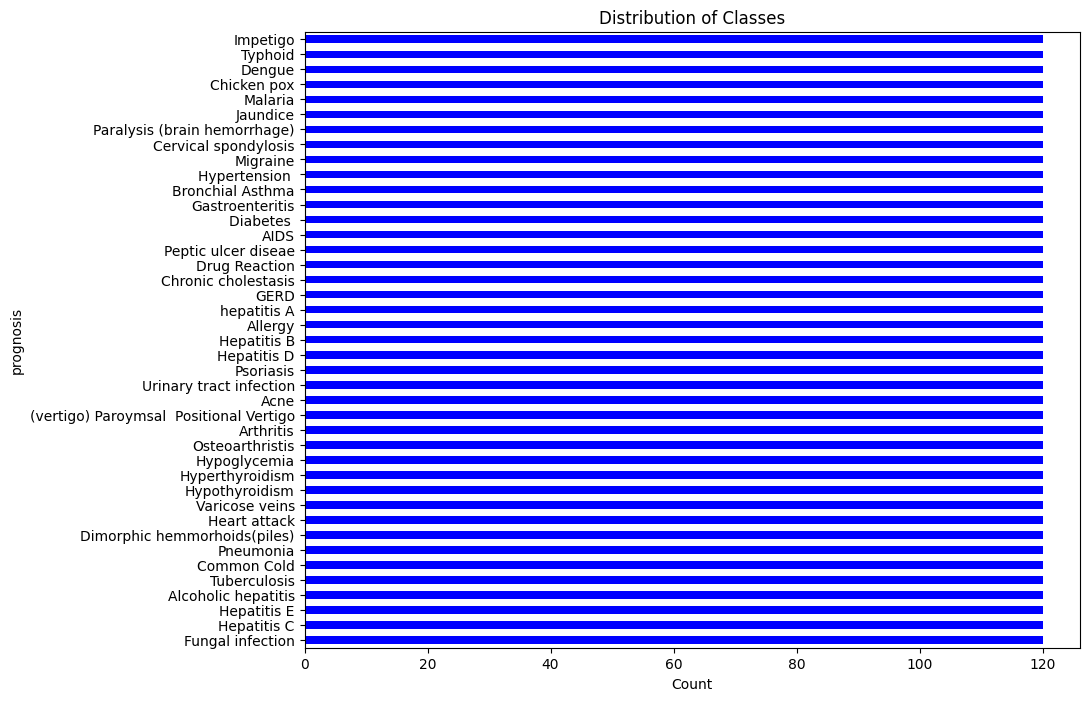

In [5]:
class_counts = train_df['prognosis'].value_counts()

# Plot the class count
class_count = train_df['prognosis']

plt.figure(figsize = (10,8))
class_counts.plot(kind = 'barh',color = 'blue')
plt.xlabel('Count')
plt.title('Distribution of Classes')
plt.show()

In [6]:
disease = {
    'Fungal infection': 0, 'Allergy': 1, 'GERD': 2, 'Chronic cholestasis': 3, 'Drug Reaction': 4,
    'Peptic ulcer diseae': 5, 'AIDS': 6, 'Diabetes ': 7, 'Gastroenteritis': 8, 'Bronchial Asthma': 9,
    'Hypertension ': 10, 'Migraine': 11, 'Cervical spondylosis': 12, 'Paralysis (brain hemorrhage)': 13,
    'Jaundice': 14, 'Malaria': 15, 'Chicken pox': 16, 'Dengue': 17, 'Typhoid': 18, 'hepatitis A': 19,
    'Hepatitis B': 20, 'Hepatitis C': 21, 'Hepatitis D': 22, 'Hepatitis E': 23, 'Alcoholic hepatitis': 24,
    'Tuberculosis': 25, 'Common Cold': 26, 'Pneumonia': 27, 'Dimorphic hemmorhoids(piles)': 28,
    'Heart attack': 29, 'Varicose veins': 30, 'Hypothyroidism': 31, 'Hyperthyroidism': 32, 'Hypoglycemia': 33,
    'Osteoarthristis': 34, 'Arthritis': 35, '(vertigo) Paroymsal  Positional Vertigo': 36, 'Acne': 37,
    'Urinary tract infection': 38, 'Psoriasis': 39, 'Impetigo': 40
}

# Apply label encoding using the 'map()' function with the disease mapping
train_df['prognosis_encoded'] = train_df['prognosis'].map(disease)
test_df['prognosis_encoded'] = test_df['prognosis'].map(disease)

In [7]:
X = train_df.drop(["prognosis", "prognosis_encoded"], axis=1)
y = train_df["prognosis_encoded"]

In [9]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [10]:
gnb = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

gnb.fit(X_train, y_train)

GaussianNB()

In [11]:
y_pred = gnb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        26
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        25
          17 

In [12]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)

MultinomialNB()

In [13]:
y_pred = mnb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        26
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        25
          17 

In [14]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(256,activation='leaky_relu'),
    tf.keras.layers.Dense(128,activation='leaky_relu'),
    tf.keras.layers.Dense(41,activation='softmax')
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [15]:
history=model.fit(
    x=X_train,
    y=y_train,
    epochs=10,
    verbose=2
)

Epoch 1/10
123/123 - 4s - 29ms/step - accuracy: 0.9197 - loss: 1.0339
Epoch 2/10
123/123 - 1s - 5ms/step - accuracy: 1.0000 - loss: 0.0140
Epoch 3/10
123/123 - 1s - 4ms/step - accuracy: 1.0000 - loss: 0.0050
Epoch 4/10
123/123 - 0s - 4ms/step - accuracy: 1.0000 - loss: 0.0027
Epoch 5/10
123/123 - 0s - 4ms/step - accuracy: 1.0000 - loss: 0.0017
Epoch 6/10
123/123 - 0s - 4ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 7/10
123/123 - 0s - 4ms/step - accuracy: 1.0000 - loss: 8.6501e-04
Epoch 8/10
123/123 - 0s - 4ms/step - accuracy: 1.0000 - loss: 6.7252e-04
Epoch 9/10
123/123 - 0s - 4ms/step - accuracy: 1.0000 - loss: 5.1923e-04
Epoch 10/10
123/123 - 0s - 4ms/step - accuracy: 1.0000 - loss: 4.2082e-04


In [16]:
pred = model.predict(X_test)
print(pred)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[6.13494649e-07 4.32303571e-09 1.12603061e-06 ... 1.78072384e-07
  3.55313219e-08 5.24976649e-08]
 [7.20275284e-06 3.41620944e-06 4.06222853e-07 ... 5.63316235e-06
  5.14904423e-06 4.49192748e-06]
 [1.01039106e-07 4.30052040e-07 1.04784685e-05 ... 8.94298609e-08
  2.07254061e-06 2.54060910e-06]
 ...
 [2.95942141e-06 1.47515751e-08 3.32035803e-08 ... 7.53967200e-09
  3.09889536e-08 9.64420678e-07]
 [1.57669433e-08 5.49498191e-06 2.98877512e-06 ... 4.40932638e-07
  3.71780651e-08 1.29384784e-06]
 [3.56113105e-07 3.83110176e-07 4.16586765e-08 ... 1.36949450e-06
  1.58113983e-06 3.82785356e-06]]


In [17]:
lst1 = []
for lst in pred:
    lst1.append(np.argmax(lst))

In [18]:
lst1

[14,
 28,
 29,
 8,
 2,
 25,
 21,
 38,
 10,
 25,
 16,
 15,
 2,
 14,
 24,
 27,
 34,
 14,
 31,
 1,
 12,
 13,
 38,
 0,
 28,
 3,
 9,
 33,
 16,
 19,
 19,
 7,
 28,
 3,
 40,
 32,
 27,
 0,
 35,
 32,
 31,
 33,
 0,
 14,
 22,
 27,
 32,
 29,
 7,
 32,
 15,
 1,
 0,
 8,
 7,
 9,
 28,
 0,
 4,
 4,
 33,
 4,
 36,
 28,
 34,
 36,
 28,
 20,
 9,
 15,
 4,
 6,
 1,
 39,
 34,
 26,
 29,
 5,
 1,
 18,
 22,
 35,
 14,
 32,
 2,
 24,
 38,
 31,
 7,
 25,
 0,
 5,
 2,
 0,
 25,
 33,
 31,
 9,
 5,
 26,
 21,
 21,
 24,
 11,
 21,
 24,
 4,
 7,
 28,
 39,
 6,
 35,
 11,
 30,
 13,
 6,
 7,
 15,
 33,
 36,
 25,
 0,
 7,
 29,
 5,
 27,
 6,
 20,
 38,
 23,
 33,
 16,
 8,
 7,
 22,
 1,
 22,
 5,
 18,
 0,
 9,
 29,
 36,
 14,
 32,
 20,
 17,
 9,
 17,
 28,
 19,
 29,
 8,
 17,
 21,
 1,
 8,
 0,
 20,
 20,
 34,
 2,
 38,
 38,
 4,
 26,
 31,
 33,
 40,
 10,
 28,
 33,
 32,
 5,
 17,
 24,
 4,
 25,
 22,
 0,
 30,
 24,
 8,
 38,
 24,
 35,
 3,
 10,
 4,
 9,
 14,
 15,
 12,
 12,
 11,
 5,
 0,
 30,
 21,
 14,
 25,
 8,
 33,
 36,
 33,
 38,
 12,
 18,
 28,
 16,
 20,
 9,
 11,
 7,

In [19]:
print(f"Accuracy: {accuracy_score(y_test, lst1)}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        26
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        25
          17 

In [24]:
import numpy as np

# Create reverse dictionary mapping values to keys using dictionary comprehension
reverse_disease = {value: key for key, value in disease.items()}

# Iterate through rows in X_test DataFrame
for index, test_point in X_test.iterrows():
    # Convert test_point (pandas Series) to a NumPy array
    test_point_array = test_point.values
    
    # Reshape the array to make it 2D (required for model prediction)
    test_point_array_2d = test_point_array.reshape(1, -1)  # -1 determines the number of features automatically
    
    # Make predictions using the model
    pred = model.predict(test_point_array_2d)
    
    # Print the corresponding prediction
    print("Prediction:", reverse_disease.get(np.argmax(pred)))
    print("---")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Jaundice
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Dimorphic hemmorhoids(piles)
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction: Heart attack
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Gastroenteritis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: GERD
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Tuberculosis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediction: Hepatitis C
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediction: Urinary tract infection
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Hypertension 
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Tuberculosis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediction: Chicken pox
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Malaria
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediction: GERD
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Jaundice
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Alcoholic he

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediction: Typhoid
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction: Hepatitis D
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction: Arthritis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Prediction: Jaundice
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: Hyperthyroidism
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: GERD
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Alcoholic hepatitis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Urinary tract infection
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Hypothyroidism
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Diabetes 
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction: Tuberculosis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediction: Fungal infection
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediction: Peptic ulcer diseae
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: GERD
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Prediction: Fungal inf

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Hepatitis B
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Osteoarthristis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: GERD
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction: Urinary tract infection
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Urinary tract infection
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Drug Reaction
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Common Cold
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Hypothyroidism
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Hypoglycemia
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Impetigo
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Hypertension 
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Dimorphic hemmorhoids(piles)
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Hypoglycemia
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction: Hyperthyroidism
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Typhoid
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Gastroenteritis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Hyperthyroidism
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Acne
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Cervical spondylosis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Bronchial Asthma
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction: Drug Reaction
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction: (vertigo) Paroymsal  Positional Vertigo
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Gastroenteritis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Malaria
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Dimorphic hemmorhoids(piles)
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction: Hypothyroidism
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: hepatitis A
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Hepatitis B
---
1/1 ━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Bronchial Asthma
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Diabetes 
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: GERD
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Common Cold
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Hypothyroidism
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Peptic ulcer diseae
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Gastroenteritis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: Hypothyroidism
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Heart attack
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Cervical spondylosis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: GERD
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Bronchial Asthma
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Hepatitis D
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: Osteoarthristis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction: Jaundice
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Dimorphic hemmorhoids(piles)
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction: Hyperthyroidism
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction: Common Cold
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Fungal infection
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: AIDS
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction: Pneumonia
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Paralysis (brain hemorrhage)
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Paralysis (brain hemorrhage)
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Urinary tract infection
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: hepatitis A
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Dengue
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction: Dengue
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Gastroenteritis
---
1/1 ━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: Impetigo
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: Malaria
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction: Paralysis (brain hemorrhage)
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Varicose veins
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction: Urinary tract infection
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Arthritis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: (vertigo) Paroymsal  Positional Vertigo
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Hypertension 
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: AIDS
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Dimorphic hemmorhoids(piles)
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Acne
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction: Diabetes 
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Pneumonia
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Dengue
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Jaundice
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: Heart attack
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Arthritis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Acne
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Common Cold
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: hepatitis A
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: (vertigo) Paroymsal  Positional Vertigo
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Hypoglycemia
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Alcoholic hepatitis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Jaundice
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Paralysis (brain hemorrhage)
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Impetigo
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Pneumonia
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: GERD
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Pneumonia
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Hyperthyroidism
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Pneumonia
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction: Hepatitis C
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Hypertension 
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Typhoid
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Fungal infection
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Hepatitis E
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Malaria
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Malaria
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Pneumonia
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Acne
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: AIDS
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Typhoid
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Prediction: Pneumonia
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Dengue
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Prediction: Chronic cholestasis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Gastroenteritis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: (vertigo) Paroymsal  Positional Vertigo
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Arthritis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Typhoid
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Alcoholic hepatitis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Pneumonia
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Dengue
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Drug Reaction
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Chronic cholestasis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Common Cold
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Hyperthyroidism
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Arthritis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Paralysis (brain hemorrhage)
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Malaria
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Acne
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Allergy
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Allergy
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediction: Chronic cholestasis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Chicken pox
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Arthritis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Hyperthyroidism
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Osteoarthristis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Hypothyroidism
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Cervical spondylosis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Alcoholic hepatitis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Chronic cholestasis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/ste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: AIDS
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: Paralysis (brain hemorrhage)
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Hyperthyroidism
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Hyperthyroidism
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Hepatitis D
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: Chicken pox
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Impetigo
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Drug Reaction
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Bronchial Asthma
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: hepatitis A
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: Drug Reaction
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Drug Reaction
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Hepatitis B
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Dengue
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Hepat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Prediction: (vertigo) Paroymsal  Positional Vertigo
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction: Impetigo
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: Allergy
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Alcoholic hepatitis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: GERD
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Hepatitis B
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Cervical spondylosis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Hepatitis E
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Gastroenteritis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: hepatitis A
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction: Paralysis (brain hemorrhage)
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: hepatitis A
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Prediction: Hepatitis C
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Varicose veins
---
1/1 ━━━━━━━━━━━━━━━━━

In [25]:
test = pd.read_csv("Training.csv")

In [26]:
X1 = test_df.drop(["prognosis", "prognosis_encoded"], axis=1)
y1 = test_df["prognosis_encoded"]

In [27]:
import numpy as np

# Create reverse dictionary mapping values to keys using dictionary comprehension
reverse_disease = {value: key for key, value in disease.items()}

# Iterate through rows in X_test DataFrame
for index, test_point in X1.iterrows():
    # Convert test_point (pandas Series) to a NumPy array
    test_point_array = test_point.values
    
    # Reshape the array to make it 2D (required for model prediction)
    test_point_array_2d = test_point_array.reshape(1, -1)  # -1 determines the number of features automatically
    
    # Make predictions using the model
    pred = model.predict(test_point_array_2d)
    
    # Print the corresponding prediction
    print("Prediction:", reverse_disease.get(np.argmax(pred)))
    print("---")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Fungal infection
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Allergy
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: GERD
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Chronic cholestasis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: Drug Reaction
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Peptic ulcer diseae
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction: AIDS
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Prediction: Diabetes 
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Gastroenteritis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediction: Bronchial Asthma
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Prediction: Hypertension 
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction: Migraine
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction: Cervical spondylosis
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediction: Paralysis (brain hemorrhage)
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
P

In [29]:
test_df["prognosis"]

0                            Fungal infection
1                                     Allergy
2                                        GERD
3                         Chronic cholestasis
4                               Drug Reaction
5                         Peptic ulcer diseae
6                                        AIDS
7                                   Diabetes 
8                             Gastroenteritis
9                            Bronchial Asthma
10                              Hypertension 
11                                   Migraine
12                       Cervical spondylosis
13               Paralysis (brain hemorrhage)
14                                   Jaundice
15                                    Malaria
16                                Chicken pox
17                                     Dengue
18                                    Typhoid
19                                hepatitis A
20                                Hepatitis B
21                                

In [30]:
model.save('model.h5')